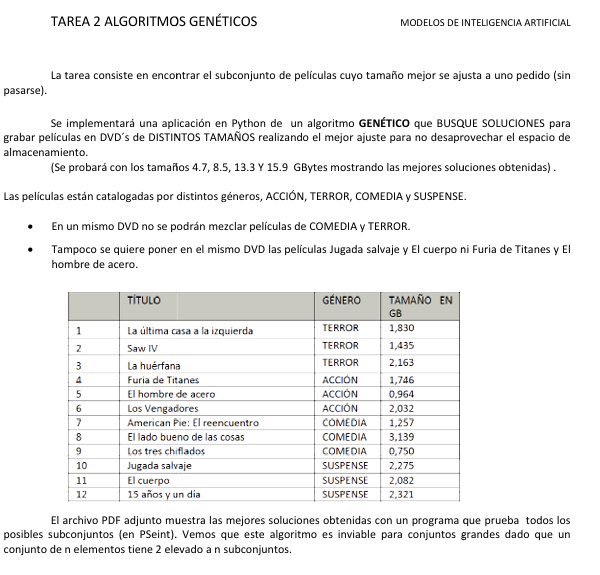

In [20]:
import random
import numpy as np

# Datos de las películas
peliculas = [
    {"titulo": "La última casa a la izquierda", "genero": "TERROR", "tamano": 1.830},
    {"titulo": "Saw IV", "genero": "TERROR", "tamano": 1.435},
    {"titulo": "La huérfana", "genero": "TERROR", "tamano": 2.163},
    {"titulo": "Furia de Titanes", "genero": "ACCIÓN", "tamano": 1.746},
    {"titulo": "El hombre de acero", "genero": "ACCIÓN", "tamano": 0.964},
    {"titulo": "Los Vengadores", "genero": "ACCIÓN", "tamano": 2.032},
    {"titulo": "American Pie: El reencuentro", "genero": "COMEDIA", "tamano": 1.257},
    {"titulo": "El lado bueno de las cosas", "genero": "COMEDIA", "tamano": 3.139},
    {"titulo": "Los tres chiflados", "genero": "COMEDIA", "tamano": 0.750},
    {"titulo": "Jugada salvaje", "genero": "SUSPENSE", "tamano": 2.275},
    {"titulo": "El cuerpo", "genero": "SUSPENSE", "tamano": 2.082},
    {"titulo": "15 años y un día", "genero": "SUSPENSE", "tamano": 2.321}
]

# Restricciones de DVDs y películas específicas
restricciones_peliculas = [
    ("Jugada salvaje", "El cuerpo"),
    ("Furia de Titanes", "El hombre de acero")
]
restricciones_genero = ("COMEDIA", "TERROR")

# Tamaños de DVD a optimizar
tamano_dvds = [4.7, 8.5, 13.3, 15.9]

# Parámetros del algoritmo genético
NUM_INDIVIDUOS = 100
GENERACIONES = 100
PROB_MUTACION = 0.1

# Función de evaluación del fitness
def calcular_fitness(individuo, tamano_dvd):
    """
    Calcula el valor de fitness de un individuo. Este valor representa qué tan bien el individuo
    cumple con los objetivos de maximizar el uso del espacio del DVD sin excederlo y respetar las restricciones.

    Args:
        individuo (list[int]): Lista binaria que indica qué películas están seleccionadas (1) o no (0).
        tamano_dvd (float): Capacidad máxima del DVD en GB.

    Returns:
        float: El valor de fitness del individuo, que es el tamaño total de las películas seleccionadas
               si cumplen con las restricciones, o 0 si violan alguna restricción.
    """
    # Calcula el tamaño total de las películas seleccionadas
    total_tamano = sum(p["tamano"] for i, p in enumerate(peliculas) if individuo[i] == 1)

    # Penalización si el tamaño excede el límite del DVD
    if total_tamano > tamano_dvd:
        return 0

    # Verifica restricciones de género
    generos = {peliculas[i]["genero"] for i in range(len(peliculas)) if individuo[i] == 1}
    if restricciones_genero[0] in generos and restricciones_genero[1] in generos:
        return 0

    # Verifica restricciones de combinaciones específicas de películas
    for restriccion in restricciones_peliculas:
        if any(p["titulo"] == restriccion[0] for i, p in enumerate(peliculas) if individuo[i] == 1) and \
           any(p["titulo"] == restriccion[1] for i, p in enumerate(peliculas) if individuo[i] == 1):
            return 0

    # Retorna el tamaño total como fitness si el individuo cumple las restricciones
    return total_tamano

# Crear un individuo (representación binaria de selección de películas)
def crear_individuo():
    """
    Crea un individuo aleatorio para la población inicial.
    Cada individuo es una lista binaria donde 1 indica que una película está seleccionada para el DVD,
    y 0 indica que no lo está.

    Returns:
        list[int]: Lista binaria representando la selección de películas.
    """
    return [random.randint(0, 1) for _ in peliculas]

# Selección de los mejores individuos
def seleccion(poblacion, tamano_dvd):
    """
    Selecciona los mejores individuos de la población basándose en su fitness.

    Args:
        poblacion (list[list[int]]): La población actual de individuos.
        tamano_dvd (float): Capacidad del DVD en GB para evaluar el fitness.

    Returns:
        list[list[int]]: Lista de individuos seleccionados para la siguiente generación.
    """
    puntuaciones = [(individuo, calcular_fitness(individuo, tamano_dvd)) for individuo in poblacion]
    puntuaciones = sorted(puntuaciones, key=lambda x: x[1], reverse=True)
    seleccionados = [p[0] for p in puntuaciones[:NUM_INDIVIDUOS // 2]]
    return seleccionados

# Cruce entre dos individuos
def cruce(ind1, ind2):
    """
    Realiza el cruce (recombinación) entre dos individuos. El punto de cruce se elige aleatoriamente,
    y se combinan las partes de los padres para crear dos hijos.

    Args:
        ind1 (list[int]): Primer individuo (padre).
        ind2 (list[int]): Segundo individuo (madre).

    Returns:
        tuple: Dos nuevos individuos (hijos) generados por el cruce.
    """
    punto = random.randint(1, len(ind1) - 2)
    # Intercambia las partes de los padres en el punto de cruce
    return ind1[:punto] + ind2[punto:], ind2[:punto] + ind1[punto:]

# Mutación de un individuo
def mutacion(individuo):
    """
    Realiza una mutación aleatoria en un individuo, cambiando el valor de uno de sus genes.
    La mutación ocurre con una probabilidad predefinida. Si ocurre, elige un gen aleatorio y cambia
    su valor de 0 a 1 o de 1 a 0.

    Args:
        individuo (list[int]): Individuo a mutar.
    """
    if random.random() < PROB_MUTACION:
        punto = random.randint(0, len(individuo) - 1)
        # Cambia el bit en el punto seleccionado
        individuo[punto] = 1 - individuo[punto]

# Algoritmo genético principal
def algoritmo_genetico(tamano_dvd):
    """
    Ejecuta el algoritmo genético para encontrar la mejor combinación de películas que maximice
    el uso del espacio del DVD respetando las restricciones.

    Args:
        tamano_dvd (float): Capacidad máxima del DVD en GB.
    """
    # Inicializa la población con individuos aleatorios
    poblacion = [crear_individuo() for _ in range(NUM_INDIVIDUOS)]

    for _ in range(GENERACIONES):
        # Selecciona los mejores individuos para la siguiente generación
        seleccionados = seleccion(poblacion, tamano_dvd)

        # Genera nueva población con cruce y mutación
        nueva_poblacion = []
        while len(nueva_poblacion) < NUM_INDIVIDUOS:
            padre = random.choice(seleccionados)
            madre = random.choice(seleccionados)
            hijo1, hijo2 = cruce(padre, madre)
            mutacion(hijo1)
            mutacion(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])

        # Actualiza la población
        poblacion = nueva_poblacion

    # Encuentra el mejor individuo de la última generación
    mejor_individuo = max(poblacion, key=lambda ind: calcular_fitness(ind, tamano_dvd))
    mejor_fitness = calcular_fitness(mejor_individuo, tamano_dvd)

    # Imprime las películas seleccionadas y el espacio total usado
    seleccionadas = [peliculas[i]["titulo"] for i in range(len(peliculas)) if mejor_individuo[i] == 1]
    print(f"Mejor ajuste para DVD de {tamano_dvd} GB:")
    print(f"Películas seleccionadas: {seleccionadas}")
    print(f"Espacio utilizado: {mejor_fitness:.3f} GB\n")

# Ejecutar el algoritmo para cada tamaño de DVD
for tamano in tamano_dvds:
    algoritmo_genetico(tamano)


Mejor ajuste para DVD de 4.7 GB:
Películas seleccionadas: ['Jugada salvaje', '15 años y un día']
Espacio utilizado: 4.596 GB

Mejor ajuste para DVD de 8.5 GB:
Películas seleccionadas: ['La última casa a la izquierda', 'La huérfana', 'Los Vengadores', '15 años y un día']
Espacio utilizado: 8.346 GB

Mejor ajuste para DVD de 13.3 GB:
Películas seleccionadas: ['La última casa a la izquierda', 'Saw IV', 'La huérfana', 'El hombre de acero', 'Los Vengadores', 'Jugada salvaje', '15 años y un día']
Espacio utilizado: 13.020 GB

Mejor ajuste para DVD de 15.9 GB:
Películas seleccionadas: ['La última casa a la izquierda', 'Saw IV', 'La huérfana', 'Furia de Titanes', 'Los Vengadores', 'Jugada salvaje', '15 años y un día']
Espacio utilizado: 13.802 GB



### Estructura del Código y Conceptos Clave

### Parámetros e Hiperparámetros

1. **Población Inicial (`NUM_INDIVIDUOS`)**:
   - La **población inicial** es el conjunto de posibles soluciones (individuos) generadas aleatoriamente. Cada individuo representa un posible conjunto de películas seleccionadas para un DVD.
   - En este caso, se ha definido que la población inicial tendrá `NUM_INDIVIDUOS = 100` individuos.

2. **Generaciones (`GENERACIONES`)**:
   - Las **generaciones** representan el número de veces que la población evolucionará, es decir, que se realizará la selección, cruce y mutación.
   - En este código, `GENERACIONES = 100` significa que la evolución ocurrirá durante 100 generaciones.

3. **Probabilidad de Mutación (`PROB_MUTACION`)**:
   - La **mutación** introduce variabilidad en los individuos al cambiar aleatoriamente una de sus características (genes).
   - La probabilidad de mutación se ha definido como `PROB_MUTACION = 0.1`, lo que significa que cada individuo tiene un 10% de probabilidad de sufrir una mutación en cada generación.

### Partes del Código y su Función

#### 1. `calcular_fitness`

```python
def calcular_fitness(individuo, tamano_dvd):
    # Calcula el tamaño total de las películas seleccionadas
    total_tamano = sum(p["tamano"] for i, p in enumerate(peliculas) if individuo[i] == 1)
    
    # Penalización si el tamaño excede el límite del DVD
    if total_tamano > tamano_dvd:
        return 0
    
    # Verifica restricciones de género
    generos = {peliculas[i]["genero"] for i in range(len(peliculas)) if individuo[i] == 1}
    if restricciones_genero[0] in generos and restricciones_genero[1] in generos:
        return 0
    
    # Verifica restricciones de combinaciones específicas de películas
    for restriccion in restricciones_peliculas:
        if any(p["titulo"] == restriccion[0] for i, p in enumerate(peliculas) if individuo[i] == 1) and \
           any(p["titulo"] == restriccion[1] for i, p in enumerate(peliculas) if individuo[i] == 1):
            return 0
    
    # Retorna el tamaño total como fitness si el individuo cumple las restricciones
    return total_tamano
```

**Explicación**:
   - **Función de fitness**: mide qué tan "bueno" es un individuo. En este caso, el valor de fitness representa el tamaño total de las películas seleccionadas en el individuo.
   - Si el tamaño total supera el tamaño del DVD, el fitness se penaliza con un valor de 0 (no viable).
   - Si el individuo cumple las restricciones de género y combinaciones de películas, se considera una solución válida y su fitness es el tamaño total de las películas seleccionadas.

#### 2. `crear_individuo`

```python
def crear_individuo():
    return [random.randint(0, 1) for _ in peliculas]
```

**Explicación**:
   - **Cromosoma**: cada individuo se representa como una lista de 1s y 0s (binaria), donde cada elemento indica si una película está seleccionada (1) o no (0).
   - Esta función genera un cromosoma aleatorio, inicializando la población con posibles soluciones aleatorias.

#### 3. `seleccion`

```python
def seleccion(poblacion, tamano_dvd):
    puntuaciones = [(individuo, calcular_fitness(individuo, tamano_dvd)) for individuo in poblacion]
    puntuaciones = sorted(puntuaciones, key=lambda x: x[1], reverse=True)
    seleccionados = [p[0] for p in puntuaciones[:NUM_INDIVIDUOS // 2]]
    return seleccionados
```

**Explicación**:
   - **Selección**: toma la población actual y evalúa el fitness de cada individuo. Los individuos con mayor fitness son seleccionados para la reproducción.
   - Los mejores `NUM_INDIVIDUOS // 2` individuos (es decir, el 50% con mayor fitness) pasan a la siguiente generación, asegurando que las mejores soluciones se conserven.

En el contexto de Python, `key=lambda` es una forma de especificar una función de clave (key function) que define cómo se debe ordenar o filtrar una colección de datos. En este caso, se utiliza en la función `sorted` para ordenar la lista de individuos en función de su **fitness**.

La sintaxis completa de `sorted` en este caso es:

```python
puntuaciones = sorted(puntuaciones, key=lambda x: x[1], reverse=True)
```

1. **`sorted`**:
   - Esta función ordena una lista. Por defecto, `sorted` ordena en orden ascendente, pero aquí se usa `reverse=True` para ordenar en orden descendente (de mayor a menor).

2. **`key=lambda x: x[1]`**:
   - La palabra clave `key` permite definir cómo se compararán los elementos en la lista. Aquí, `key=lambda x: x[1]` especifica que la función debe comparar los elementos en función del segundo valor de cada elemento `x`.

3. **`lambda x: x[1]`**:
   - `lambda` es una forma de definir una función anónima (sin nombre) en Python.
   - `x` representa cada elemento de la lista `puntuaciones`.
   - Cada elemento `x` en `puntuaciones` es una tupla `(individuo, fitness)`, donde `x[0]` es el individuo y `x[1]` es el fitness del individuo.
   - Por lo tanto, `lambda x: x[1]` indica que se debe usar el segundo valor de la tupla (el fitness) como criterio para ordenar.

#### 4. `cruce`

```python
def cruce(ind1, ind2):
    punto = random.randint(1, len(ind1) - 2)
    return ind1[:punto] + ind2[punto:], ind2[:punto] + ind1[punto:]
```

**Explicación**:
   - **Recombinación o cruce**: toma dos individuos (padres) y genera dos nuevos individuos (hijos) al combinar las partes de los padres en un punto de cruce aleatorio.
   - Este proceso permite que los "genes" de ambos padres se mezclen, creando una nueva combinación que puede heredar los atributos buenos de cada padre.

#### 5. `mutacion`

```python
def mutacion(individuo):
    if random.random() < PROB_MUTACION:
        punto = random.randint(0, len(individuo) - 1)
        individuo[punto] = 1 - individuo[punto]
```

**Explicación**:
   - **Mutación**: modifica aleatoriamente un gen del cromosoma de un individuo, invirtiendo su valor (de 0 a 1 o viceversa).
   - Esto introduce variabilidad en la población, ayudando a explorar nuevas soluciones y evitando que el algoritmo se estanque en óptimos locales.

#### 6. `algoritmo_genetico`

```python
def algoritmo_genetico(tamano_dvd):
    poblacion = [crear_individuo() for _ in range(NUM_INDIVIDUOS)]
    
    for _ in range(GENERACIONES):
        seleccionados = seleccion(poblacion, tamano_dvd)
        
        nueva_poblacion = []
        while len(nueva_poblacion) < NUM_INDIVIDUOS:
            padre = random.choice(seleccionados)
            madre = random.choice(seleccionados)
            hijo1, hijo2 = cruce(padre, madre)
            mutacion(hijo1)
            mutacion(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])
        
        poblacion = nueva_poblacion
    
    mejor_individuo = max(poblacion, key=lambda ind: calcular_fitness(ind, tamano_dvd))
    mejor_fitness = calcular_fitness(mejor_individuo, tamano_dvd)
    
    seleccionadas = [peliculas[i]["titulo"] for i in range(len(peliculas)) if mejor_individuo[i] == 1]
    print(f"Mejor ajuste para DVD de {tamano_dvd} GB:")
    print(f"Películas seleccionadas: {seleccionadas}")
    print(f"Espacio utilizado: {mejor_fitness:.3f} GB\n")
```

**Explicación**:
   - **Algoritmo genético**: es el núcleo de todo el proceso.
   - **Inicialización**: crea la población inicial con `NUM_INDIVIDUOS` individuos aleatorios.
   - **Evolución**: en cada generación:
     - **Selección** de los individuos con mayor fitness.
     - **Reproducción** mediante cruce y mutación, generando una nueva población.
   - **Resultado**: al final, el individuo con mayor fitness en la última generación se considera la mejor solución encontrada.